### Importing useful libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from matplotlib import cm

from matplotlib import font_manager
font_path = 'C://Users//amita//AppData//Local//Microsoft//Windows//Fonts/Barlow-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
data = pd.read_csv('chowdary.csv', index_col=0)

y = data['tumour']
X = data.drop('tumour', axis=1)

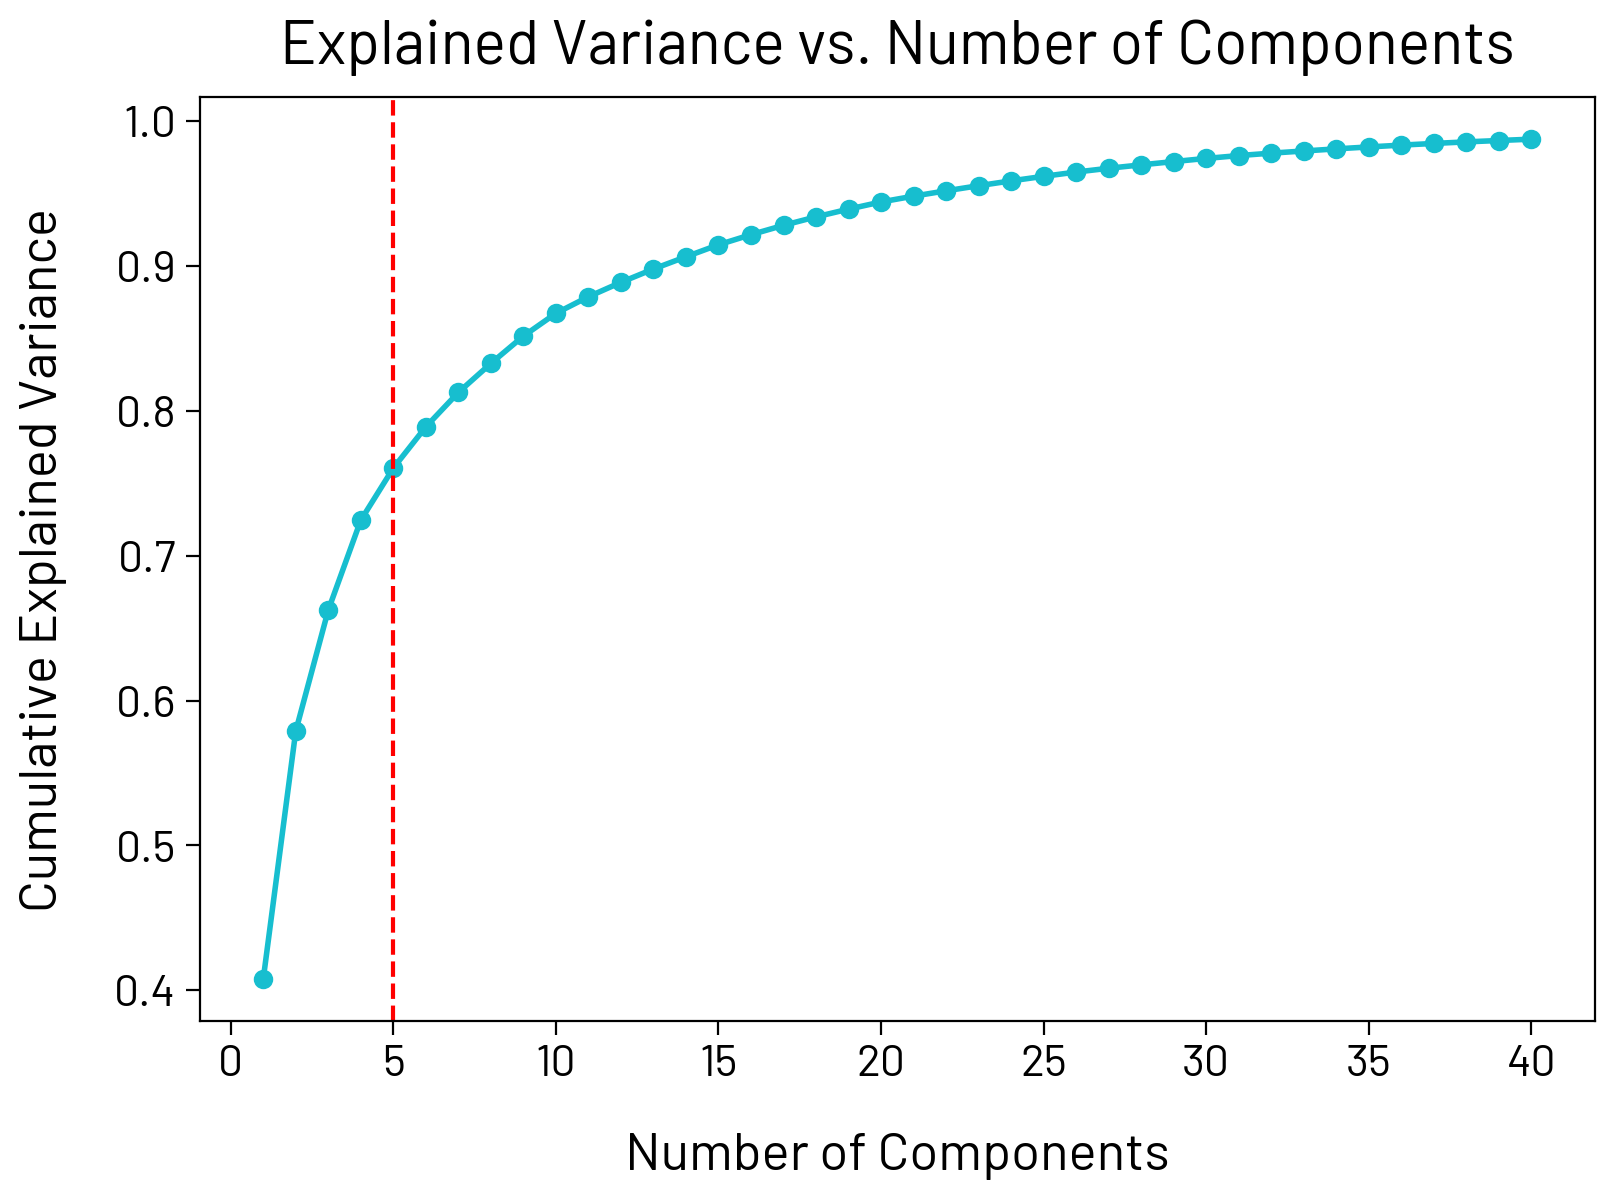

In [147]:
# Fit PCA and calculate cumulative variance explained
pca = PCA(n_components=40).fit(X_scaled)
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(9, 6), dpi=200)
# plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,'o-', linewidth=2, c='seagreen')

# Plotting the cumulative variance explained
plt.plot(np.arange(1,41), np.cumsum(pca.explained_variance_ratio_),'o-', linewidth=2, c='tab:cyan')
plt.xlabel('Number of Components', fontsize=19, labelpad=17)
plt.ylabel('Cumulative Explained Variance', fontsize=19, labelpad=17)
plt.title('Explained Variance vs. Number of Components', fontsize=22, pad=12)

# Adding vertical line for cumulative sum > 75
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio > 0.75) + 1
plt.axvline(x=n_components, linestyle='--', color='red')
plt.xticks(np.arange(0,41,5))
plt.tick_params(size=5, labelsize=16)
plt.show()

In [98]:
# Fit PCA with 75% variance explained
pca = PCA(n_components=6).fit(X_scaled)
X_pca = pca.transform(X_scaled)

### Which feature has more contribution to a component

In [99]:
n_top_features = 5

for i in range(pca.n_components_):
    component = pca.components_[i]
    top_features = X.columns[np.argsort(np.abs(component))[::-1]][:n_top_features]
    print(f"\nTop {n_top_features} features for PC{i+1}:")
    print(list(top_features))


Top 5 features for PC1:
['X203824_at', 'X209211_at', 'X209847_at', 'X201884_at', 'X202831_at']

Top 5 features for PC2:
['X204457_s_at', 'X205713_s_at', 'X202952_s_at', 'X202437_s_at', 'X214777_at']

Top 5 features for PC3:
['X204508_s_at', 'X214142_at', 'X207214_at', 'X204673_at', 'X203256_at']

Top 5 features for PC4:
['X204667_at', 'X209604_s_at', 'X209602_s_at', 'X209603_at', 'X205225_at']

Top 5 features for PC5:
['X209374_s_at', 'X203951_at', 'X201496_x_at', 'X201497_x_at', 'X207961_x_at']

Top 5 features for PC6:
['X205044_at', 'X209016_s_at', 'X204734_at', 'X209351_at', 'X203638_s_at']


## Importance of features as per their contribution to the principal component

In [116]:
loadings = pd.DataFrame(data=pca.components_.T * np.sqrt(pca.explained_variance_), 
                        columns=[f'PC{i}' for i in range(1, 7)], index=X.columns)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6
X201123_s_at,0.746664,0.354267,-0.169037,0.052546,-0.259429,-0.187531
X201262_s_at,0.404839,0.821344,0.034080,-0.042878,-0.034215,-0.101875
X201496_x_at,0.306069,0.167017,0.040808,-0.291604,0.531870,0.058216
X201497_x_at,0.609213,0.275948,0.133737,-0.267637,0.497353,0.110769
X201525_at,0.097569,0.432000,0.149196,0.106688,-0.088863,0.236988


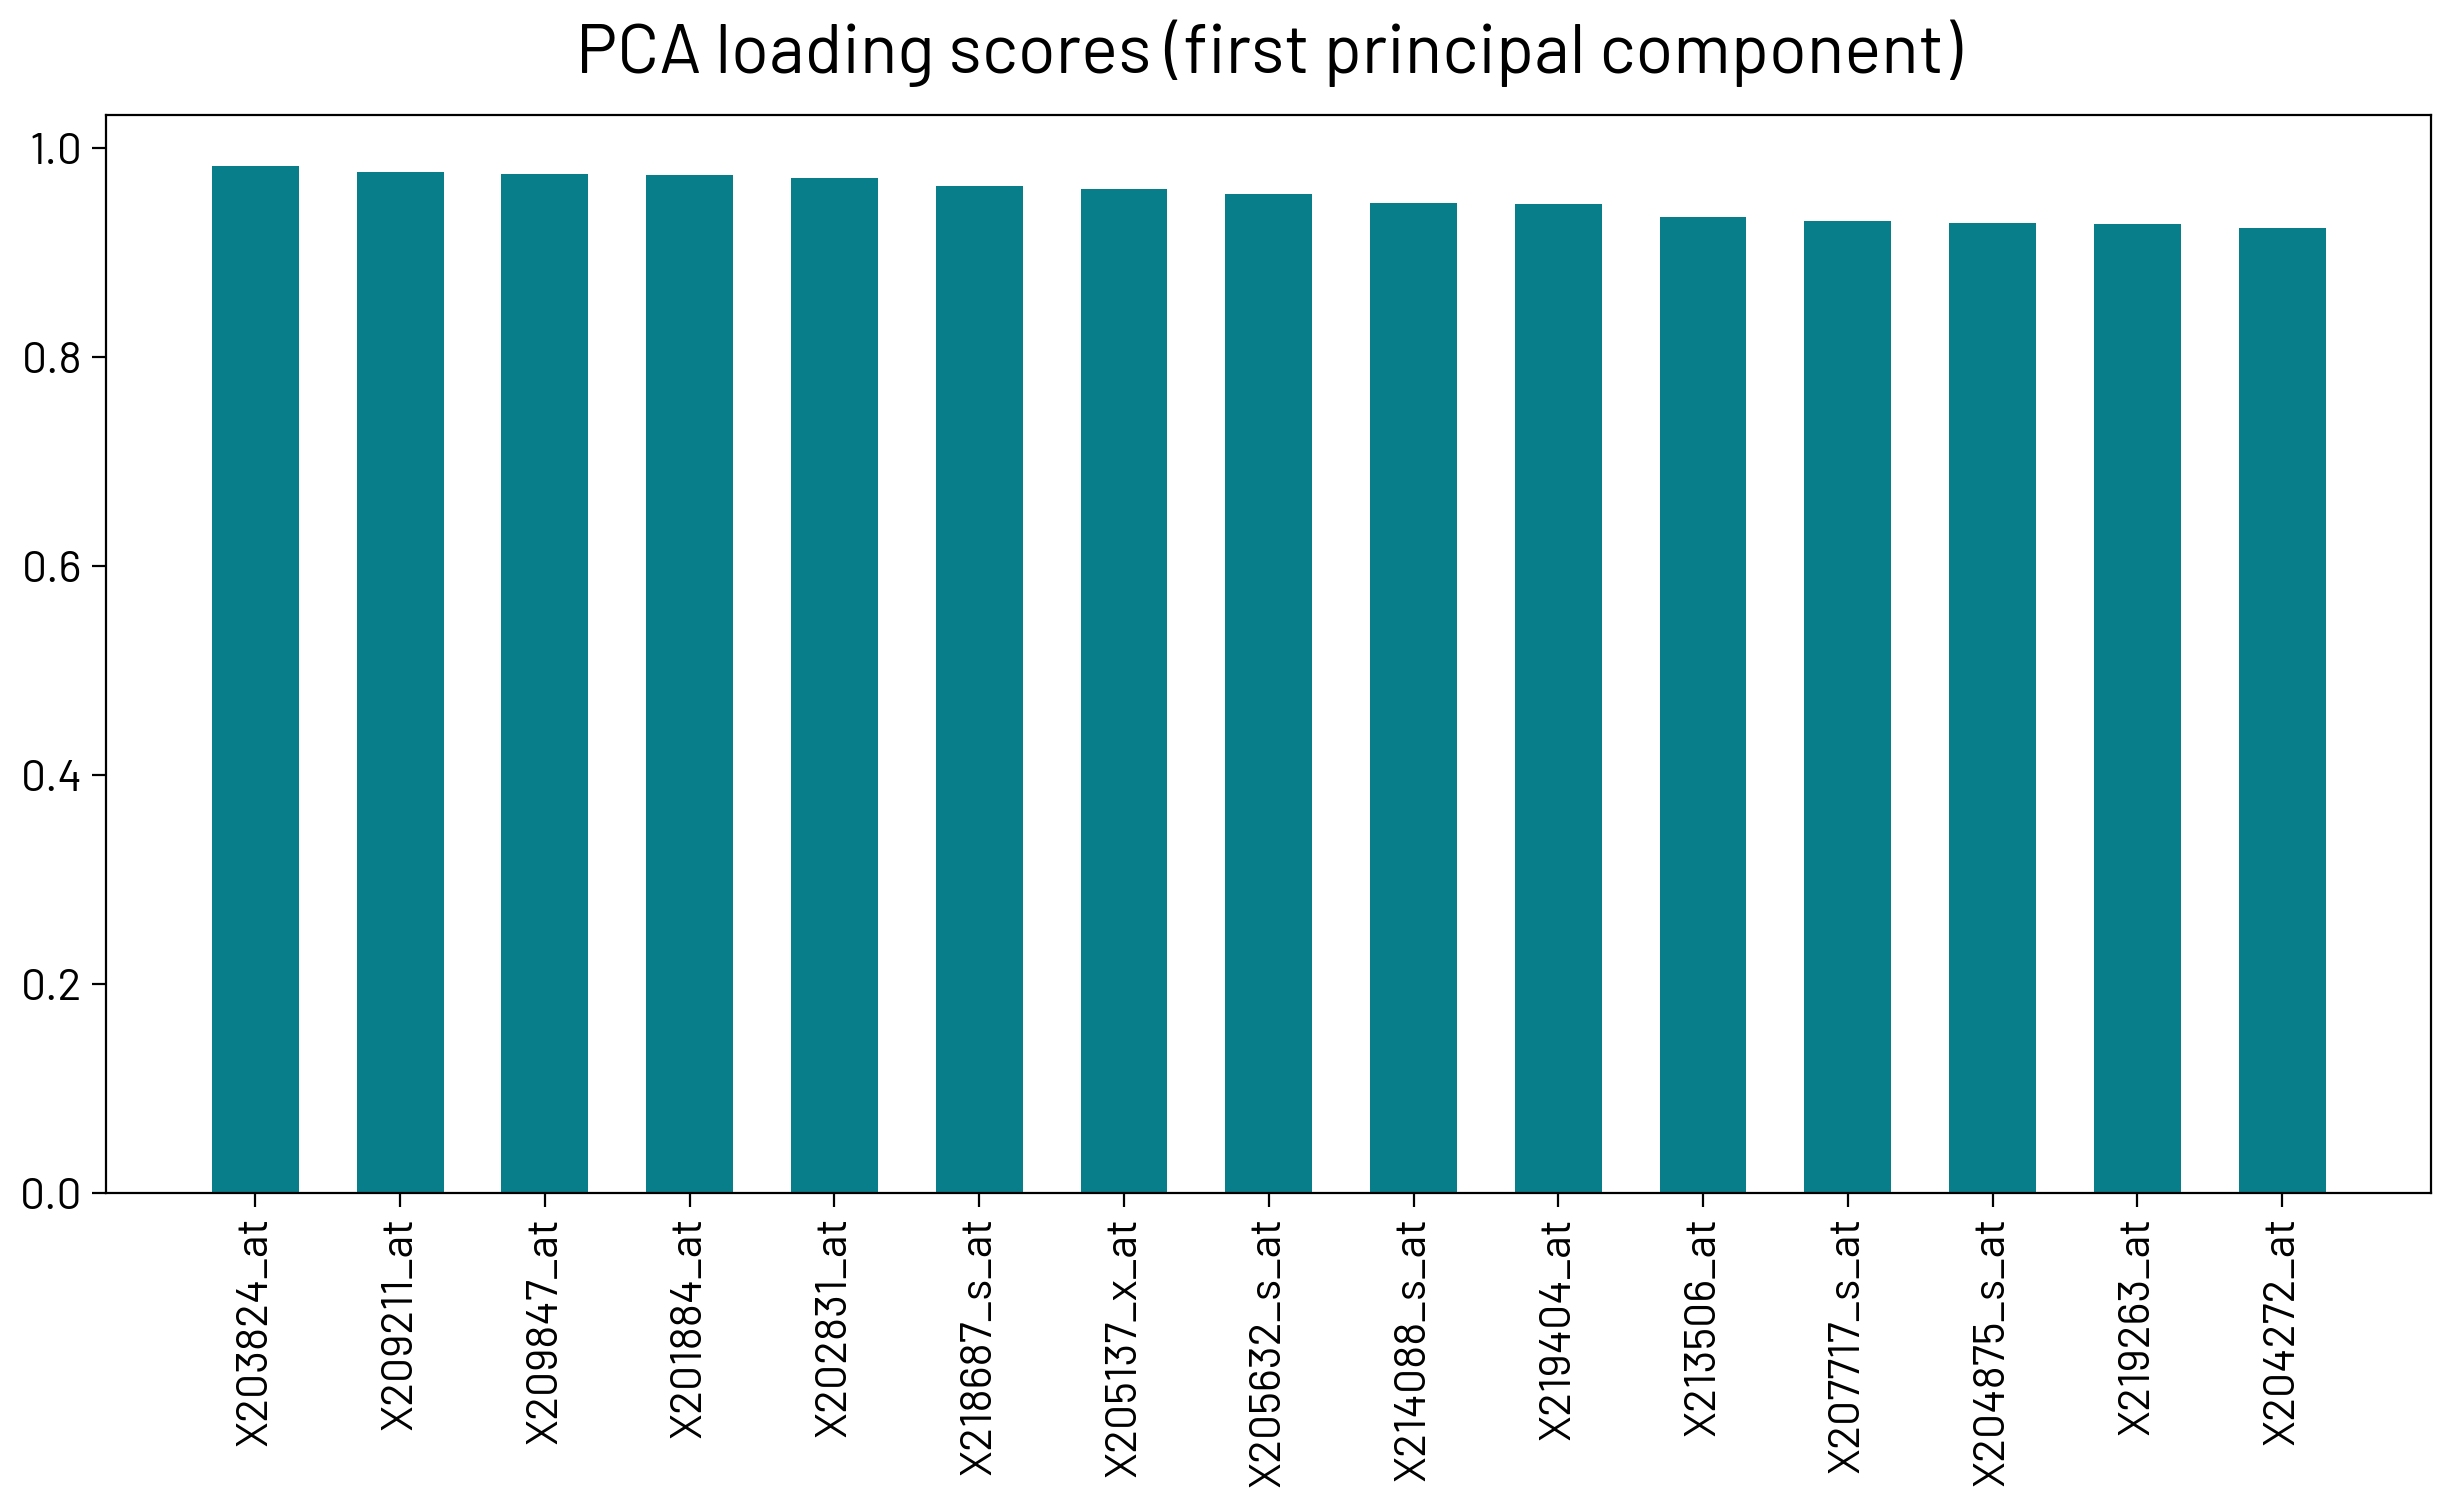

In [162]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

final_df = pc1_loadings.iloc[:15]
plt.figure(figsize=(15,7), dpi=200)
plt.bar(x=final_df['Attribute'], height=final_df['CorrelationWithPC1'], color='#087E8B', width=0.6)
plt.title('PCA loading scores (first principal component)', fontsize=25, pad=15)
plt.xticks(rotation='vertical')
plt.tick_params(size=5, labelsize=16)
plt.show()

In [148]:
print(pc1_loadings)

        Attribute  CorrelationWithPC1
0      X203824_at            0.982346
1      X209211_at            0.977185
2      X209847_at            0.975463
3      X201884_at            0.973723
4      X202831_at            0.971562
..            ...                 ...
177  X209604_s_at           -0.206635
178    X204653_at           -0.211428
179  X202286_s_at           -0.224954
180  X209016_s_at           -0.225498
181  X209602_s_at           -0.239386

[182 rows x 2 columns]


## Plot PCA variable plots for each component

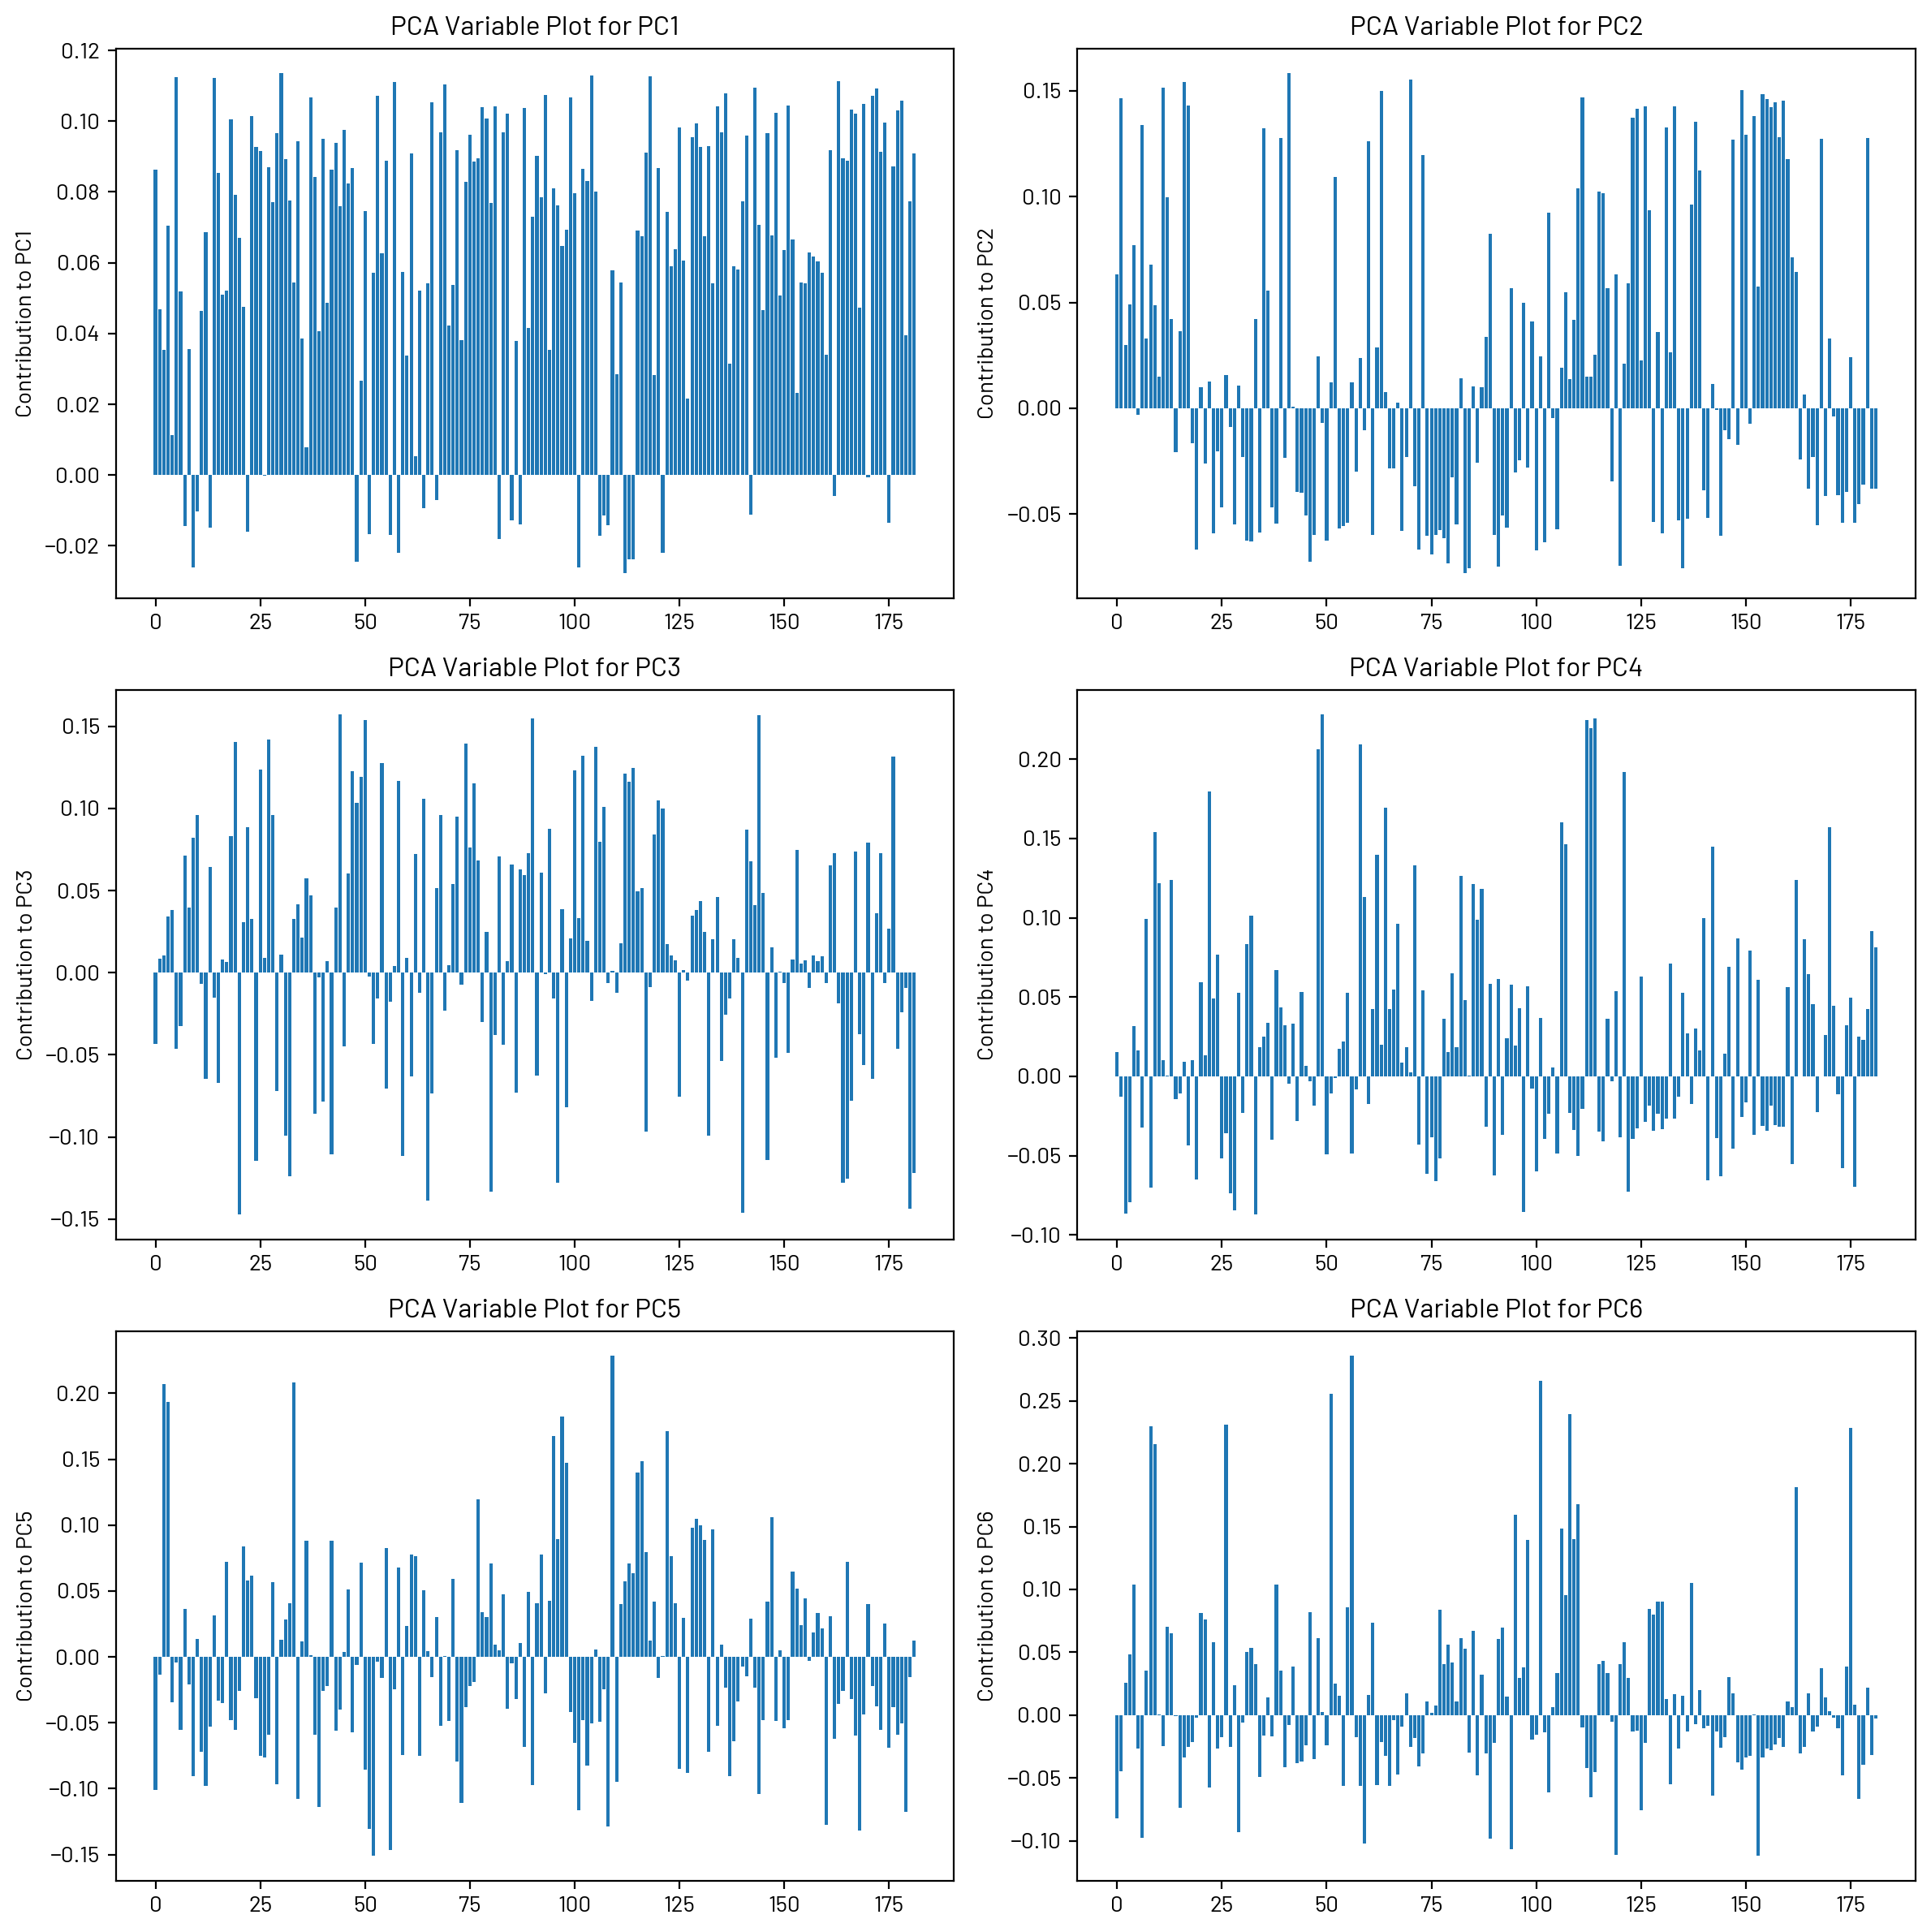

In [89]:
num_components = pca.n_components_
num_features = X_scaled.shape[1]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12), dpi=200)

for component, ax in enumerate(axes.flatten()):
    ax.bar(np.arange(num_features), pca.components_[component])
    ax.set_ylabel('Contribution to PC{}'.format(component+1))
    ax.set_title('PCA Variable Plot for PC{}'.format(component+1))
    
plt.tight_layout()
plt.show()

## Fit logistic regression model using principal components and no regularization

In [108]:
clf = LogisticRegression(solver='liblinear', max_iter=1000).fit(X_pca, y)

In [109]:
from sklearn.metrics import f1_score

f1_score(y.values, clf.predict(X_pca), average="binary", pos_label="B")

0.9838709677419355

### Cross validation

In [125]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Set up the values of alpha to test
alpha = 0.1

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

f1_scores = []

pca = PCA(n_components=6)
model = LogisticRegression(solver='liblinear', max_iter=10000)

# Loop over the different folds
for train_idx, val_idx in kf.split(X):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Fit the model on the training set for this fold and alpha value
    
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    
    model.fit(X_train, y_train)

    # Calculate and add f1 score on validation set
    X_val = pca.transform(X_val)
    y_val_pred = model.predict(X_val)
    f1_scores.append(f1_score(y_val, y_val_pred, pos_label='B'))

In [126]:
f1_scores

[1.0, 1.0, 0.9565217391304348, 1.0, 0.9600000000000001]

In [127]:
np.mean(f1_scores)

0.9833043478260869

## Logistic Regression Without PCA

In [132]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Set up the values of alpha to test
alpha = 0.1

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

f1_scores = []

model = LogisticRegression(solver='liblinear', max_iter=10000)

# Loop over the different folds
for train_idx, val_idx in kf.split(X):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Fit the model on the training set for this fold and alpha value
    
    model.fit(X_train, y_train)

    # Calculate and add f1 score on validation set
    y_val_pred = model.predict(X_val)
    f1_scores.append(f1_score(y_val, y_val_pred, pos_label='B'))

In [133]:
f1_scores

[1.0, 1.0, 0.9166666666666666, 0.967741935483871, 0.9600000000000001]

In [134]:
np.mean(f1_scores)

0.9688817204301076